In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
import ShAReD_Net.model.layer.heatmap_2d as heatmap_2d
import ShAReD_Net.model.layer.heatmap_1d as heatmap_1d


In [17]:
def show_imgs(images):
    plt.figure(figsize=(10,30))
    for i, img in enumerate(images):
        cs = img.shape[-1]
        for c in range(cs):
            ax = plt.subplot(8,2,i*cs+c+1)
            plt.imshow(img[...,c])
            plt.axis('off')

tf.Tensor(
[[0.9999999 ]
 [0.9999999 ]
 [0.99999964]
 [0.99999976]], shape=(4, 1), dtype=float32)
LocationMap None
loc_map_shape (20, 40, 2)
pos tf.Tensor([390. 190.], shape=(2,), dtype=float32)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [2.]], shape=(4, 1), dtype=float32)
loc: tf.Tensor(
[[205. 105.]
 [205. 105.]
 [300.  30.]
 [ 25. 175.]], shape=(4, 2), dtype=float32)
gt: [[205. 105.]
 [205. 105.]
 [300.  30.]
 [ 25. 175.]]
loc: tf.Tensor(
[[205. 105.]
 [205. 105.]
 [300.  30.]
 [ 50. 350.]], shape=(4, 2), dtype=float32)
gt: [[205. 105.]
 [205. 105.]
 [300.  30.]
 [ 25. 175.]]
indexes loc: tf.Tensor(
[[11 21]
 [11 21]
 [ 3 30]
 [19  5]], shape=(4, 2), dtype=int32)
indexes map: tf.Tensor(
[[11 21]
 [11 21]
 [ 3 30]
 [19  5]], shape=(4, 2), dtype=int32)
var_loss: tf.Tensor([1.9073486e-06 2.0000000e+02 0.0000000e+00 2.5000002e+01], shape=(4,), dtype=float32)
loc_loss: (<tf.Tensor: shape=(4,), dtype=float32, numpy=array([    0.,     0.,     0., 15625.], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=

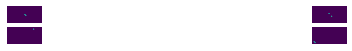

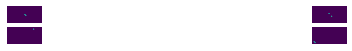

In [18]:
bins = [40,20]

loc_prop_map = np.zeros([4,bins[1],bins[0],1],dtype=np.float32)
loc_prop_map[0,10,20,0]=0.5   #x,y [20.5,10.5]
loc_prop_map[0,11,21,0]=0.5   
loc_prop_map[1,9,19,0]=0.5    #x,y [20.5,10.5]
loc_prop_map[1,12,22,0]=0.5
loc_prop_map[2,3,30,0]=1      #x,y [30,3]
loc_prop_map[3,17,2,0]=1
loc_prop_map[3,18,3,0]=1      #x,y [2.5,17.5]

gt_loc = np.asarray([[205,105],[205,105],[300,30],[25,175]],dtype=np.float32)

show_imgs(loc_prop_map)

ftpm = heatmap_2d.FeatureToLocationPropabilityMap()
loc_prop_map_test = ftpm(loc_prop_map)
print(tf.reduce_sum(loc_prop_map_test,axis=[1,2]))

show_imgs(loc_prop_map_test)

loc_map_op = heatmap_2d.LocationMap(min_loc=[0,0], max_loc=[400,200],bins=bins)
loc_map = loc_map_op([0.,0.])
print("loc_map_shape", loc_map.shape)

show_imgs(loc_map[None,...])
print("pos",loc_map[19,39])  #x,y [39,19] = 390,190


sum_loc_prob = tf.reduce_sum(loc_prop_map, axis=[1,2])
loc_prop_map_test = loc_prop_map / sum_loc_prob[:,:,None,None]
print(sum_loc_prob)
pmtl = heatmap_2d.PropabilityMapToLocation()
loc = pmtl(loc_prop_map_test, loc_map)
print("loc:",loc)
print("gt:",gt_loc)

assert(tf.reduce_all(loc == gt_loc))

pmtl = heatmap_2d.PropabilityMapToLocation()
loc = pmtl(loc_prop_map, loc_map)
print("loc:",loc)
print("gt:",gt_loc)


lti = heatmap_2d.LocationToIndex(loc_map_op.loc_delta, loc_map_op.min_loc, bins)
indexes_loc = lti(loc)
print("indexes loc:",indexes)

pmti = heatmap_2d.PropabilityMapToIndex()
indexes_map = pmti(loc_prop_map)
print("indexes map:",indexes)

assert(tf.reduce_all(indexes_loc == indexes_map))

vll = heatmap_2d.VarianceLocatonLoss(loc_map_op.loc_delta)
loss = vll(loc_prop_map, loc_map, gt_loc)
print("var_loss:",loss)

vlapl = heatmap_2d.VarianceLocationAndPossitionLoss(loc_map_op.loc_delta)
loss = vlapl(loc_prop_map, loc, loc_map, gt_loc)
print("loc_loss:",loss)

In [47]:
def show_imgs_z(images,text=""):
    plt.figure(figsize=(30,5))
    for i, img in enumerate(images):
        cs = img.shape[-1]
        for c in range(cs):
            ax = plt.subplot(2,20,i*cs+c+1)
            plt.imshow(img[...,c])
            plt.title(text)
            plt.axis('off')

tf.Tensor(
[[[1.         1.         1.         1.         1.        ]
  [1.         1.         1.         0.9999999  1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         0.9999999  1.         1.        ]]

 [[1.         1.         1.         1.         1.        ]
  [1.         0.99999994 1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.        ]]], shape=(2, 7, 5), dtype=float32)
tf.Tensor(
[[[[   0.  150.  300.  450.  600.  750.  900. 1050. 1200. 1350. 1500.
    1650. 1800. 1950. 2100. 2250. 2400. 2550.

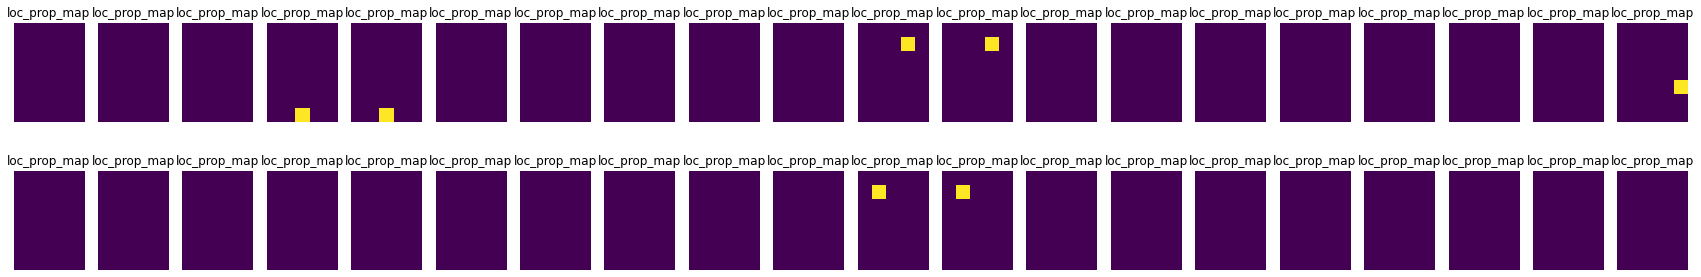

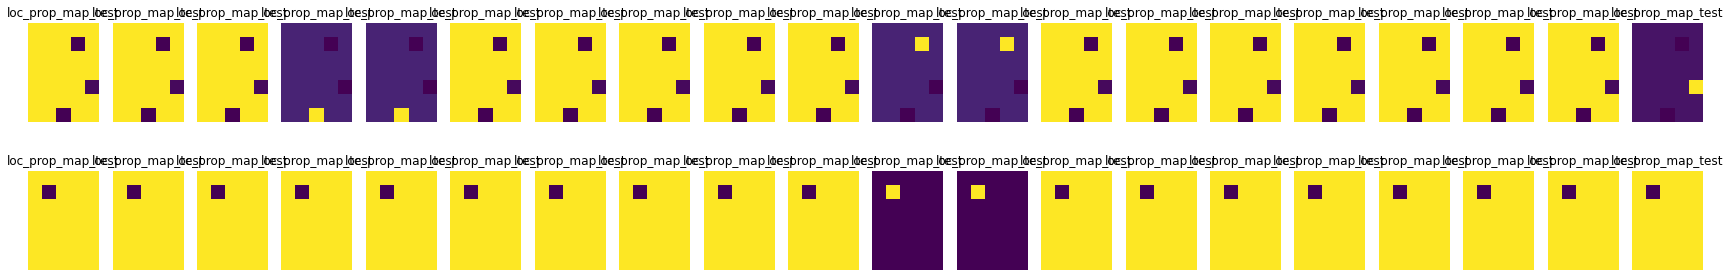

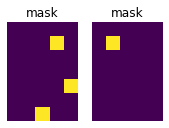

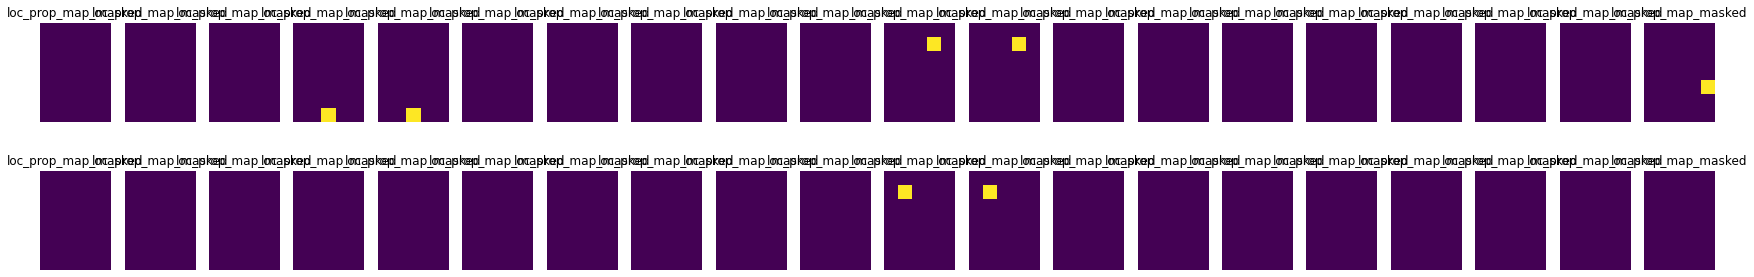

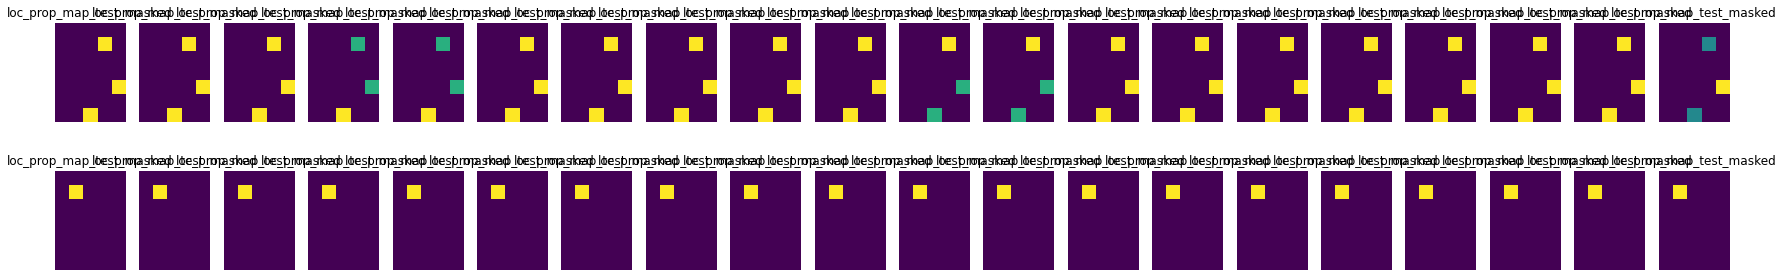

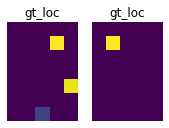

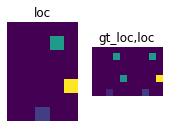

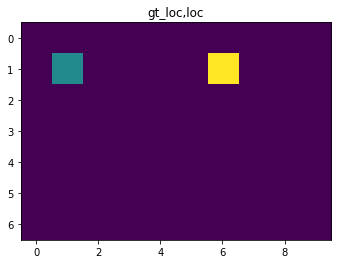

var_loss: tf.Tensor(
[[[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [6.250000e+02]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [1.816875e+06]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [5.062500e+04]
   [0.000000e+00]
   [0.000000e+00]]]


 [[[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [1.687500e+04]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]]

  [[0.000000e+00]
   [0.000000e+00]
   [0.000000e+00]
   

In [48]:
bins = 20
bin_half = int(bins/2)
loc_prop_map = np.zeros([2,7,5,bins],dtype=np.float32)
loc_prop_map[0,1,3,bin_half]=0.5
loc_prop_map[0,1,3,bin_half+1]=0.5
loc_prop_map[0,6,2,3]=0.5
loc_prop_map[0,6,2,4]=0.5
loc_prop_map[0,4,4,19]=1
loc_prop_map[1,1,1,bin_half]=1
loc_prop_map[1,1,1,bin_half+1]=1

show_imgs_z(loc_prop_map,"loc_prop_map")

ftpm = heatmap_1d.FeatureToLocationPropabilityMap()
loc_prop_map_test = ftpm(loc_prop_map)

show_imgs_z(loc_prop_map_test,"loc_prop_map_test")

print(tf.reduce_sum(loc_prop_map_test,axis=[-1]))

loc_map_op = heatmap_1d.LocationMap(bins=bins)
loc_map = loc_map_op(0.)
print(loc_map)

gt_index = np.asarray([[0,1,3],[0,6,2],[0,4,4],[1,1,1]],dtype=np.float32)
gt_loc = np.asarray([1550,300,1500,1500],dtype=np.float32)

mask = heatmap_1d.mask_from_index(gt_index, loc_prop_map.shape[0:3])

show_imgs_z(mask,"mask")

loc_prop_map_masked = heatmap_1d.mask_propability_map((loc_prop_map, mask))
loc_prop_map_test_masked = heatmap_1d.mask_propability_map((loc_prop_map_test, mask))
print(tf.reduce_sum(loc_prop_map_test,axis=[-1]))

show_imgs_z(loc_prop_map_masked,"loc_prop_map_masked")
show_imgs_z(loc_prop_map_test_masked, "loc_prop_map_test_masked")

assert(tf.reduce_all(loc_prop_map_masked == loc_prop_map))

gt_loc = heatmap_1d.expand_gt(gt_index, gt_loc, tf.shape(loc_prop_map)[0:3])

show_imgs_z(gt_loc,"gt_loc")

pmtl = heatmap_1d.PropabilityMapToLocation()
loc = pmtl(loc_prop_map, loc_map)
print("loc:",loc)

show_imgs_z(loc,"loc")

for kp, lo in zip(gt_loc,loc):
    plt.imshow(tf.concat([kp[...,0],lo[...,0]],axis=1))
    plt.title("gt_loc,loc")
    plt.show()

vll = heatmap_1d.VarianceLocatonLoss(loc_map_op.loc_delta)
loss = vll(loc_prop_map, loc_map, gt_loc)
print("var_loss:",loss)

vlapl = heatmap_1d.VarianceLocationAndPossitionLoss(loc_map_op.loc_delta)
loss = vlapl(loc_prop_map, loc, loc_map, gt_loc)
print("loc_loss:",loss)
